<a href="https://colab.research.google.com/github/Samuelsilvestre/Export2025BR/blob/master/Analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise da Balança Comercial Brasileira: Exportações por Setor (2024-2025)

**Pacotes**

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**URLS**

In [70]:
URL_AGROPECUARIA = 'https://raw.githubusercontent.com/Samuelsilvestre/Export2025BR/master/dados/exportacao_agropecuaria.csv'
URL_TRANSFORMACAO = 'https://raw.githubusercontent.com/Samuelsilvestre/Export2025BR/master/dados/exportacao_industria_transformacao.csv'
URL_EXTRATIVA = 'https://raw.githubusercontent.com/Samuelsilvestre/Export2025BR/master/dados/exportacao_industria_extrativa.csv'

data_agro = pd.read_csv(URL_AGROPECUARIA, encoding='latin-1', sep=';', decimal=',', thousands='.')
data_trans = pd.read_csv(URL_TRANSFORMACAO, encoding='latin-1', sep=';', decimal=',', thousands='.')
data_extrativ = pd.read_csv(URL_EXTRATIVA, encoding='latin-1', sep=';', decimal=',', thousands='.')

**Estrutura dos dados**

In [71]:
display(data_agro.columns)
display(data_trans.columns)
display(data_extrativ.columns)

Index(['Produto', 'Valor 2025 (US$ Mi)', 'MD 2025', 'Valor 2024 (US$ Mi)',
       'MD 2024', 'Var. % (MD)', 'Part. % 2025', 'Part. % 2024'],
      dtype='object')

Index(['Produto', 'Valor 2025 (US$ Mi)', 'MD 2025', 'Valor 2024 (US$ Mi)',
       'MD 2024', 'Var. % (MD)', 'Part. % 2025', 'Part. % 2024'],
      dtype='object')

Index(['Produto', 'Valor 2025 (US$ Mi)', 'MD 2025', 'Valor 2024 (US$ Mi)',
       'MD 2024', 'Var. % (MD)', 'Part. % 2025', 'Part. % 2024'],
      dtype='object')

**Removendo a linha 0**

In [72]:
data_agro.drop(0, inplace=True)
data_extrativ.drop(0, inplace=True)
data_trans.drop(0, inplace=True)



**Identificando o setor**

In [73]:
data_agro['Setor'] = 'Agropecuária'
data_trans['Setor'] = 'Indústria de Transformação'
data_extrativ['Setor'] = 'Indústria Extrativista'

**Combinando as tabelas**

In [74]:
data = pd.concat([data_agro, data_trans, data_extrativ], ignore_index=True)

**Nova estrutura**

In [75]:
display(data.head())
display(data.dtypes)

,Produto,Valor 2025 (US$ Mi),MD 2025,Valor 2024 (US$ Mi),MD 2024,Var. % (MD),Part. % 2025,Part. % 2024,Setor
0,Soja,1081.34,72.08,861.49,41.02,75.72,5.00,3.46,Agropecuária
1,CafÃ© nÃ£o torrado,1066.20,71.08,1004.09,47.81,48.66,4.93,4.03,Agropecuária
2,Milho nÃ£o moÃ­do,968.10,64.54,913.30,43.49,48.39,4.48,3.67,Agropecuária
3,AlgodÃ£o em bruto,496.41,33.09,619.54,29.50,12.17,2.29,2.49,Agropecuária
4,Animais vivos,110.27,7.35,124.06,5.90,24.43,0.51,0.49,Agropecuária


,0
Produto,object
Valor 2025 (US$ Mi),float64
MD 2025,float64
Valor 2024 (US$ Mi),float64
MD 2024,float64
Var. % (MD),float64
Part. % 2025,float64
Part. % 2024,float64
Setor,object


### Visualização ###

**Comparando os periudos**

2024: US$ 24,747.12
2025: US$ 21,504.23


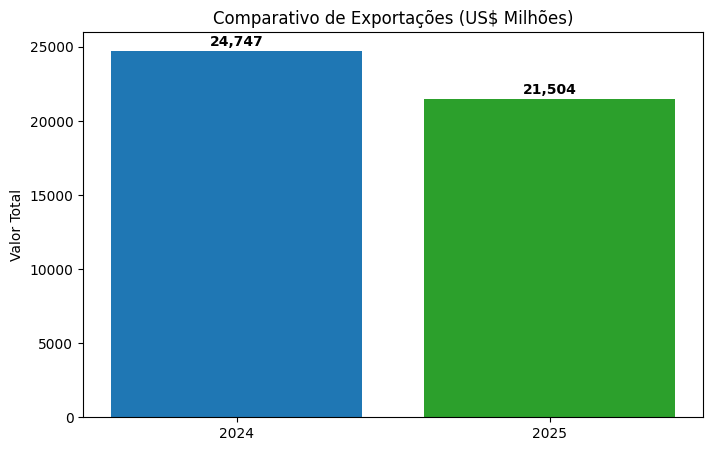

In [91]:

v24, v25 = data['Valor 2024 (US$ Mi)'].sum(), data['Valor 2025 (US$ Mi)'].sum()

print(f"2024: US$ {v24:,.2f}")
print(f"2025: US$ {v25:,.2f}")

plt.figure(figsize=(8, 5))
plt.bar(['2024', '2025'], [v24, v25], color=['#1f77b4', '#2ca02c'])
plt.title('Comparativo de Exportações (US$ Milhões)')
plt.ylabel('Valor Total')

for i, v in enumerate([v24, v25]):
    plt.text(i, v + 300, f'{v:,.0f}', ha='center', weight='bold')

plt.show()

**Valor em exportação port setor**

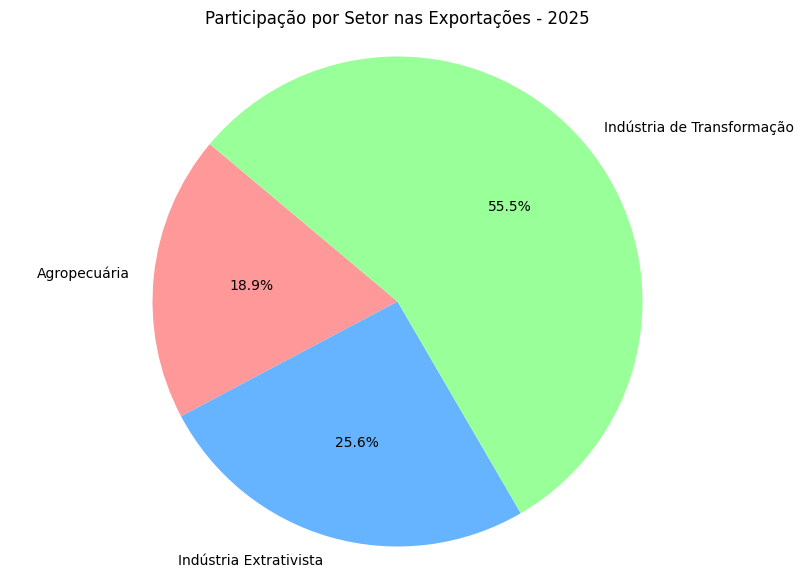

In [94]:

participacao = data.groupby('Setor')['Valor 2025 (US$ Mi)'].sum()

plt.figure(figsize=(10, 7))
plt.pie(participacao, labels=participacao.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Participação por Setor nas Exportações - 2025')
plt.axis('equal')

plt.show()

**Produtos exportados mais relevantes**

In [96]:
top_produtos = data.sort_values(by='Valor 2025 (US$ Mi)', ascending=False).head(5)
print(top_produtos[['Setor', 'Produto', 'Valor 2025 (US$ Mi)']])

                         Setor  \
16  Indústria de Transformação   
17      Indústria Extrativista   
18      Indústria Extrativista   
6   Indústria de Transformação   
0                 Agropecuária   

                                              Produto  Valor 2025 (US$ Mi)  
16                      Demais produtos nÃ£o listados              6023.22  
17  Ãleos brutos de petrÃ³leo ou de minerais betu...              2833.14  
18              MinÃ©rio de ferro e seus concentrados              1792.42  
6       Carne bovina fresca, refrigerada ou congelada              1220.60  
0                                                Soja              1081.34  


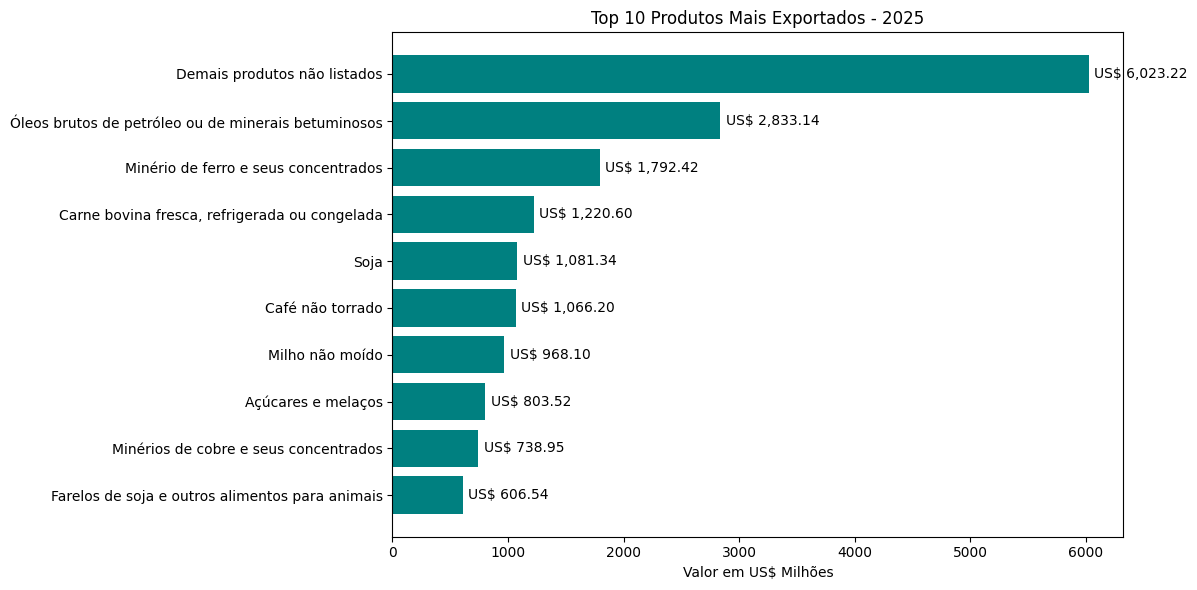

In [97]:

data['Produto_Limpo'] = data['Produto'].str.encode('latin-1', errors='ignore').str.decode('utf-8', errors='ignore')

top_10_geral = data.nlargest(10, 'Valor 2025 (US$ Mi)')

plt.figure(figsize=(12, 6))
plt.barh(top_10_geral['Produto_Limpo'], top_10_geral['Valor 2025 (US$ Mi)'], color='teal')
plt.xlabel('Valor em US$ Milhões')
plt.title('Top 10 Produtos Mais Exportados - 2025')
plt.gca().invert_yaxis()

for i, v in enumerate(top_10_geral['Valor 2025 (US$ Mi)']):
    plt.text(v + 50, i, f'US$ {v:,.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

### Conclusão
A análise dos dados oficiais da SECEX/MDIC aponta para um cenário de ajuste nas exportações brasileiras em 2025.
Embora o volume total tenha apresentado uma redução em relação ao recorde de 2024 (caindo de **US$ 24,7 bi** para **US$ 21,5 bi**),
a **Indústria de Transformação** consolidou-se como o setor de maior peso (**55,5%**), garantindo a diversidade da pauta
mesmo diante da volatilidade de preços das *commodities* minerais e agrícolas.